In [1]:
from simulation import *
from aesthetics import *
from models import *
from data import *

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
mpl.rc('text', usetex=True)
cmap = sns.color_palette("Set2", 3)

In [3]:
import pandas as pd
import scipy as sc
import os as os
import re as re

# PKA psiSER311: Sensitivity of C

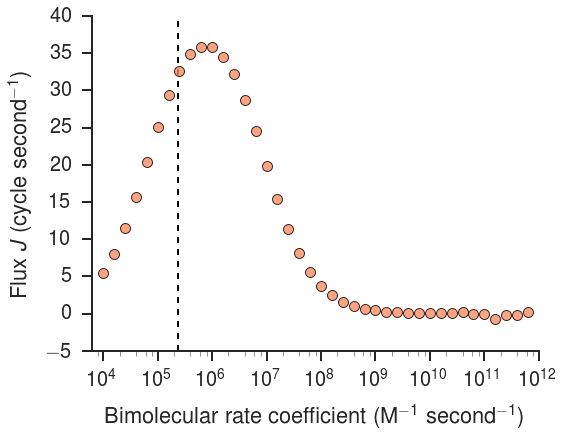

In [12]:
name = 'psiSER311'
fig = plt.figure(figsize=(8,6), dpi=300)
ax = fig.add_subplot(111)
for scaling in np.arange(4, 12, 0.2):
    this = simulation(data_source = 'pka_md_data')
    this.name = name
    this.C_intersurface = 10**scaling
    this.simulate()
    ax.scatter(this.C_intersurface, np.mean(this.flux_u + this.flux_b), 
         c=cmap[1], s=100, alpha=0.8, marker = 'o', edgecolor = 'k', linewidth = 1.0)

    del this

this = simulation(data_source = 'pka_md_data')
this.name = name
plt.axvline(this.C_intersurface, 0, 40, c='k', ls='--', lw=2, zorder=-2)


ax.set_xlabel('Bimolecular rate coefficient (M$^{-1}$ second$^{-1}$)')
ax.set_ylabel('Flux $J$ (cycle second$^{-1}$)')
# ax.set_title(name)
ax.set_xscale('log')
# pretty_plot(fig)
ax.set_xlim([10**3.8, 10**12])
aesthetics.paper_plot(fig)

# PKA psiSER311: Sensitivity to the offset

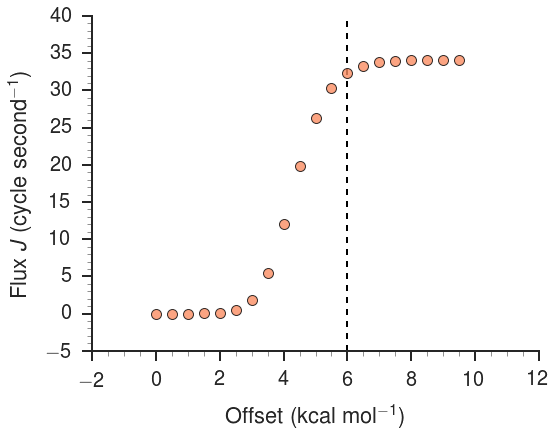

In [13]:
name = 'psiSER311'
fig = plt.figure(figsize=(8,6), dpi=300)
ax = fig.add_subplot(111)
for scaling in np.arange(0, 10, 0.5):
    this = simulation(data_source = 'pka_md_data')
    this.name = name
    this.offset_factor = scaling
    this.simulate()
    ax.scatter(this.offset_factor, np.mean(this.flux_u + this.flux_b), 
         c=cmap[1], s=100, alpha=0.8, marker = 'o', edgecolor = 'k', linewidth = 1.0)

    del this

this = simulation(data_source = 'pka_md_data')
this.name = name
plt.axvline(this.offset_factor, 0, 40, c='k', ls='--', lw=2, zorder=-2)
    
ax.set_xlabel('Offset (kcal mol$^{-1}$)')
ax.set_ylabel('Flux $J$ (cycle second$^{-1}$)')
aesthetics.paper_plot(fig)

# PKA psiSER311: Sensitivity to D

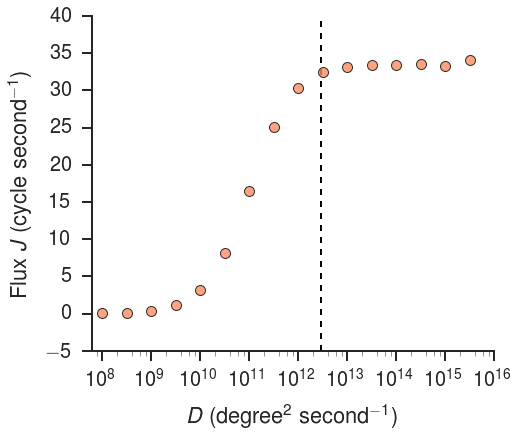

In [63]:
name = 'psiSER311'
fig = plt.figure(figsize=(6*1.2,6), dpi=300)
ax = fig.add_subplot(111)
for scaling in np.arange(8, 16, 0.5):
    this = simulation(data_source = 'pka_md_data')
    this.name = name
    this.D = 10**scaling
    this.simulate()
    ax.scatter(this.D, np.mean(this.flux_u + this.flux_b), 
             c=cmap[1], s=100, alpha=0.8, marker = 'o', edgecolor = 'k', linewidth = 1.0)
    del this

this = simulation(data_source = 'pka_md_data')
this.name = name
this.simulate()
plt.axvline(this.D, 0, 40, c='k', ls='--', lw=2, zorder=-2)

ax.set_xlabel('$D$ (degree$^{2}$ second$^{-1}$)')
ax.set_ylabel('Flux $J$ (cycle second$^{-1}$)')
ax.set_title(name)
ax.set_xscale('log')
ax.set_title('')
ax.set_xlim([10**7.8, 10**16])
aesthetics.paper_plot(fig)

# Comparison over all PKA torsions D = $3 \times 10^{15}$ and D = $3 \times 10^{12}$

In [62]:
df = pd.DataFrame()
for file in range(len(unbound_files)):
    name = os.path.splitext(os.path.basename(unbound_files[file]))[0]
    name = re.search('^[^_]*', name).group(0)
    if name == 'chi1CYM185':
        pass
    else:
        this = simulation(data_source = 'pka_md_data')
        this.name = name
        this.simulate()
        flux_with_catalysis = np.mean(this.flux_u + this.flux_b)
        flux_with_catalysis_std = np.std(this.flux_u + this.flux_b)
        del this
        
        this = simulation(data_source = 'pka_md_data')
        this.name = name
        this.D = 3 * 10 ** 12
        this.simulate()
        flux_lower_D = np.mean(this.flux_u + this.flux_b)
        flux_lower_D_std = np.std(this.flux_u + this.flux_b)
  
        df = df.append(pd.DataFrame({'Flux with catalysis': flux_with_catalysis,
                                'Flux with catalysis Std': flux_with_catalysis_std,
                                'Flux lower D': flux_lower_D,
                                'Flux lower D Std': flux_lower_D_std,
                                'File': name,
                                'Mean diff' : flux_with_catalysis - flux_lower_D,
                                'Std diff' : flux_with_catalysis_std - flux_lower_D_std
                                }, index=[0]), ignore_index=True)

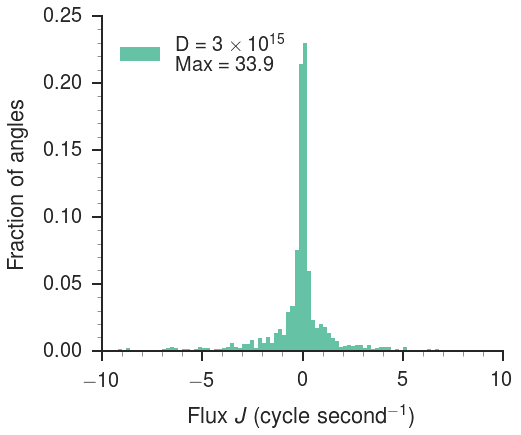

In [103]:
fig = plt.figure(figsize=(6*1.2,6), dpi=300)
ax = fig.add_subplot(111)
hist, bins = np.histogram(df['Flux with catalysis'], bins=100, range=(-10,10), weights=np.ones_like(df['Mean diff'])/float(len(df['Mean diff'])))
width = 1.0 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
ax.bar(center, hist, align='center', width=width, edgecolor=None, lw=0, label='D = $3\\times 10^{{15}}$ \n Max = {0:0.1f}'.format(df['Flux with catalysis'].max()), color=cmap[0])
ax.legend(loc=2)
ax.set_ylabel('Fraction of angles')
ax.set_xlabel('Flux $J$ (cycle second$^{-1}$)')
aesthetics.paper_plot(fig)

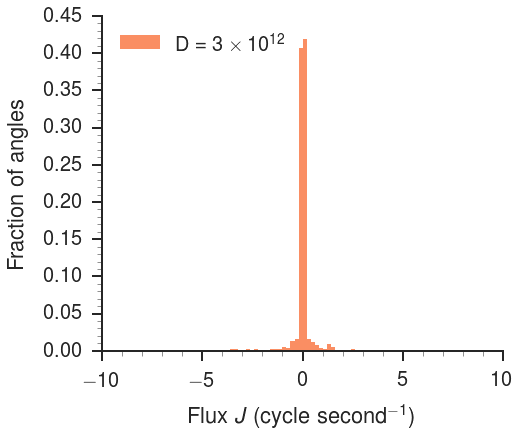

In [74]:
fig = plt.figure(figsize=(6*1.2,6), dpi=300)
ax = fig.add_subplot(111)
hist, bins = np.histogram(df['Flux lower D'], bins=100, range=(-10,10), weights=np.ones_like(df['Mean diff'])/float(len(df['Mean diff'])))
width = 1.0 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
ax.bar(center, hist, align='center', width=width, edgecolor=None, lw=0, label=r'D = $3\times 10^{12}$', color=cmap[1])
ax.legend(loc=2)
ax.set_ylabel('Fraction of angles')
ax.set_xlabel('Flux $J$ (cycle second$^{-1}$)')
aesthetics.paper_plot(fig)

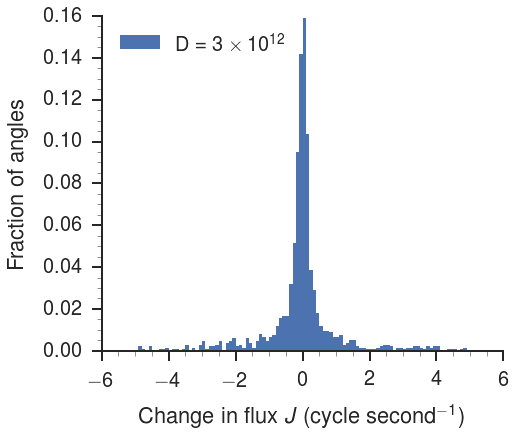

In [70]:
fig = plt.figure(figsize=(6*1.2,6), dpi=300)
ax = fig.add_subplot(111)
hist, bins = np.histogram(df['Mean diff'], bins=100, range=(-5,5), weights=np.ones_like(df['Mean diff'])/float(len(df['Mean diff'])))
width = 1.0 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
ax.bar(center, hist, align='center', width=width, edgecolor=None, lw=0, label=r'D = $3\times 10^{12}$')
ax.legend(loc=2)
ax.set_ylabel('Fraction of angles')
ax.set_xlabel('Change in flux $J$ (cycle second$^{-1}$)')
aesthetics.paper_plot(fig)

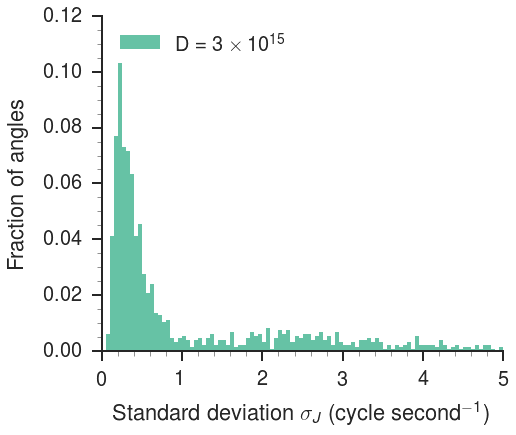

In [79]:
fig = plt.figure(figsize=(6*1.2,6), dpi=300)
ax = fig.add_subplot(111)
hist, bins = np.histogram(df['Flux with catalysis Std'], bins=100, range=(0,5), weights=np.ones_like(df['Std diff'])/float(len(df['Std diff'])))
width = 1.0 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
ax.bar(center, hist, align='center', width=width, edgecolor=None, lw=0, label=r'D = $3\times 10^{15}$', color=cmap[0])
ax.legend(loc=2)
ax.set_ylabel('Fraction of angles')
ax.set_xlabel('Standard deviation $\sigma_J$ (cycle second$^{-1}$)')
aesthetics.paper_plot(fig)

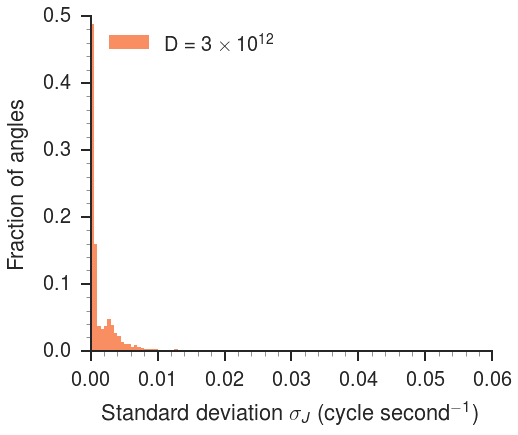

In [83]:
fig = plt.figure(figsize=(6*1.2,6), dpi=300)
ax = fig.add_subplot(111)
hist, bins = np.histogram(df['Flux lower D Std'], bins=100, range=(0,0.05), weights=np.ones_like(df['Std diff'])/float(len(df['Std diff'])))
width = 1.0 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
ax.bar(center, hist, align='center', width=width, edgecolor=None, lw=0, label=r'D = $3\times 10^{12}$', color=cmap[1])
ax.legend(loc=2)
ax.set_ylabel('Fraction of angles')
ax.set_xlabel('Standard deviation $\sigma_J$ (cycle second$^{-1}$)')
aesthetics.paper_plot(fig)

# Ways to kill flux: decrease substrate, decrease catalysis, decrease symmetry

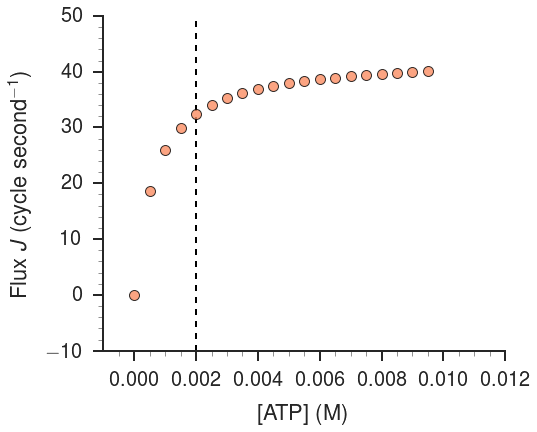

In [52]:
name = 'psiSER311'
fig = plt.figure(figsize=(6*1.2,6), dpi=300)
ax = fig.add_subplot(111)
for scaling in np.arange(0, 0.01, 0.0005):
    this = simulation()
    this.name = name
    this.data_source = 'pka_md_data'
    this.offset_factor = 6.0
    this.D = 3 * 10 **12
    this.catalytic_rate = 140
    this.cATP = scaling
    this.simulate()
    ax.scatter(this.cATP, np.mean(this.flux_u + this.flux_b), 
             c=cmap[1], s=100, alpha=0.8, marker = 'o', edgecolor = 'k', linewidth = 1.0,
             label='Glu$^{194}_{\chi_2}$' if scaling==0 else '')
    del this

this = simulation()
this.name = name
this.data_source = 'pka_md_data'
this.offset_factor = 6.0
this.D = 3 * 10 **12
this.catalytic_rate = 140
plt.axvline(this.cATP, 0, 40, c='k', ls='--', lw=2, zorder=-2)    

ax.set_xlabel('$[\\text{ATP}]$ (\\textsc{M})')
ax.set_ylabel('Flux $J$ (cycle second$^{-1}$)')
# ax.set_title(name)
# ax.legend(loc=1)
# ax.annotate('Glu$^{194}_{\chi_2}$', xy=(0.2, 0.85), xycoords='figure fraction', size=22)
ax.set_xlim([-0.001, 0.012])
aesthetics.paper_plot(fig)

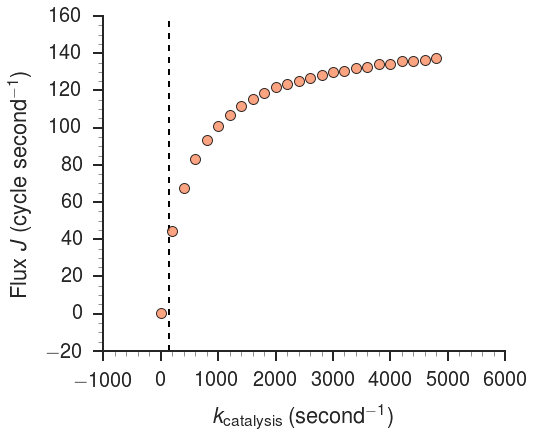

In [54]:
name = 'psiSER311'
fig = plt.figure(figsize=(6*1.2,6), dpi=300)
ax = fig.add_subplot(111)
for scaling in np.arange(0, 5000, 200):
    this = simulation()
    this.name = name
    this.data_source = 'pka_md_data'
    this.offset_factor = 6.0
    this.catalytic_rate = scaling
    this.simulate()
    ax.scatter(this.catalytic_rate, np.mean(this.flux_u + this.flux_b), 
             c=cmap[1], s=100, alpha=0.8, marker = 'o', edgecolor = 'k', linewidth = 1.0,
             label='Glu$^{194}_{\chi_2}$' if scaling==0 else '')
    del this

this = simulation()
this.name = name
this.data_source = 'pka_md_data'
this.offset_factor = 6.0
this.D = 3 * 10 **12
this.catalytic_rate = 140
plt.axvline(this.catalytic_rate, 0, 40, c='k', ls='--', lw=2, zorder=-2)    

    
ax.set_xlabel('$k_\\text{catalysis}$ (second$^{-1}$)')
ax.set_ylabel('Flux $J$ (cycle second$^{-1}$)')
# ax.set_title(name)
# ax.legend(loc=1)
# ax.annotate('Glu$^{194}_{\chi_2}$', xy=(0.2, 0.85), xycoords='figure fraction', size=22)
aesthetics.paper_plot(fig)

In [ ]:
name = 'psiSER311'
fig = plt.figure(figsize=(6*1.2,6), dpi=300)
ax = fig.add_subplot(111)
for scaling in np.arange(0, 5000, 200):
    this = simulation()
    this.name = name
    this.data_source = 'pka_md_data'
    this.offset_factor = 6.0
    this.catalytic_rate = scaling
    this.simulate()
    ax.scatter(this.catalytic_rate, np.mean(this.flux_u + this.flux_b), 
             c=cmap[1], s=100, alpha=0.8, marker = 'o', edgecolor = 'k', linewidth = 1.0,
             label='Glu$^{194}_{\chi_2}$' if scaling==0 else '')
    del this

this = simulation()
this.name = name
this.data_source = 'pka_md_data'
this.offset_factor = 6.0
this.D = 3 * 10 **12
this.catalytic_rate = 140
plt.axvline(this.catalytic_rate, 0, 40, c='k', ls='--', lw=2, zorder=-2)    

    
ax.set_xlabel('$k_\\text{catalysis}$ (second$^{-1}$)')
ax.set_ylabel('Flux $J$ (cycle second$^{-1}$)')
# ax.set_title(name)
# ax.legend(loc=1)
# ax.annotate('Glu$^{194}_{\chi_2}$', xy=(0.2, 0.85), xycoords='figure fraction', size=22)
aesthetics.paper_plot(fig)

# Investigate chi2GLU194

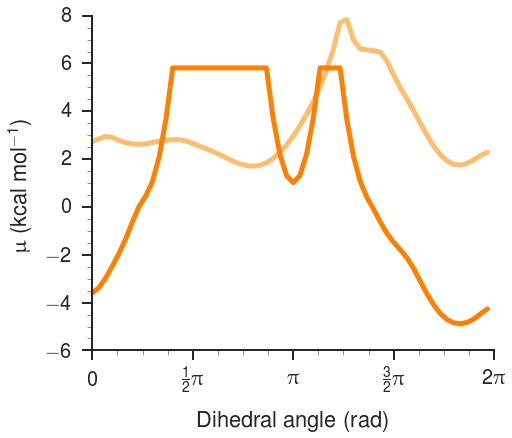

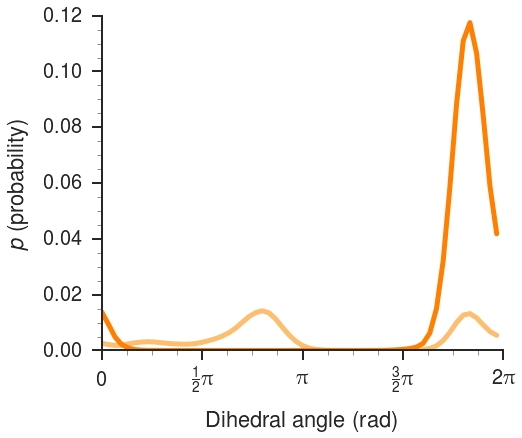

C_intrasurface = 	8.33e+10 second**-1
D = 			3.00e+12 degrees**2 second**-1
C_intersurface = 	2.40e+05 mol**-1 second**-1
Catalytic rate = 	140 second**-1
ATP concentration = 	0.002 M
Time step = 		1.00e-12 second
No populations.


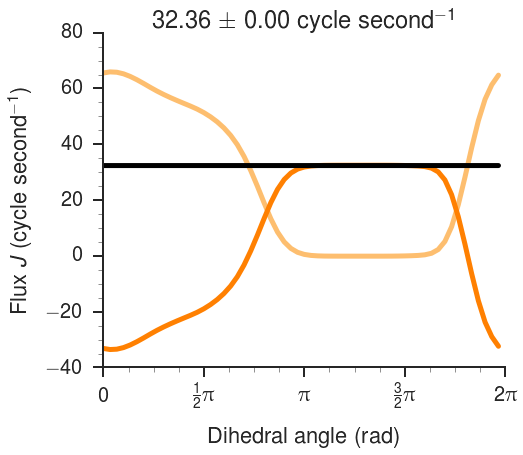

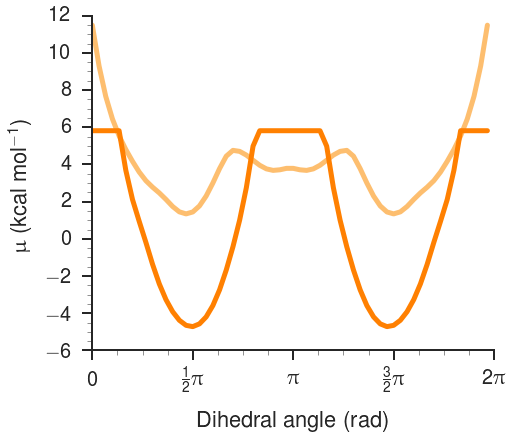

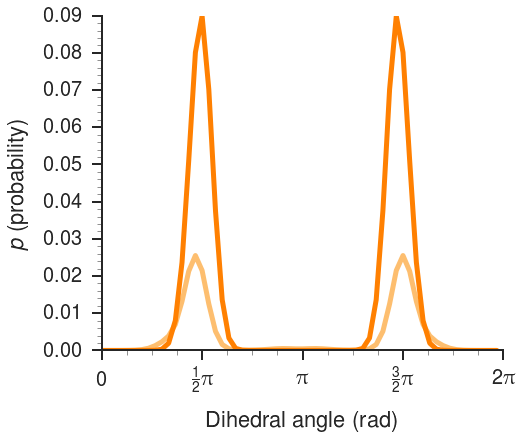

C_intrasurface = 	8.33e+10 second**-1
D = 			3.00e+12 degrees**2 second**-1
C_intersurface = 	2.40e+05 mol**-1 second**-1
Catalytic rate = 	140 second**-1
ATP concentration = 	0.002 M
Time step = 		1.00e-12 second


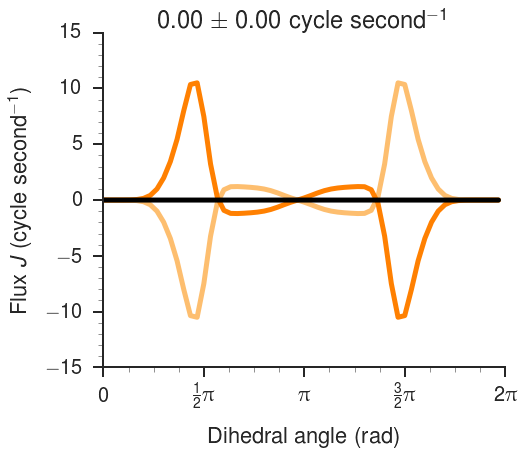

In [43]:
this = simulation()
this.name = 'chi2GLU194'
this.data_source = 'pka_md_data'
this.offset_factor = 6.0
this.D = 3 * 10 **12
this.catalytic_rate = 140
this.simulate()
this.plot_energy()
this.plot_ss()
this.plot_flux()


dir = '../../md-data/pka-md-reversed-and-averaged'
this = simulation()
this.name = 'chi2GLU194'
# Override the popluations
this.unbound_population = np.genfromtxt(dir + '/apo/' + this.name + '_chi_pop_hist_targ.txt', delimiter=',',
                                       skip_header=1)
this.bound_population = np.genfromtxt(dir + '/atpmg/' + this.name + '_chi_pop_hist_ref.txt', delimiter=',',
                                       skip_header=1)
this.offset_factor = 6.0
this.D = 3 * 10 **12
this.catalytic_rate = 140
this.simulate()
this.plot_energy()
this.plot_ss()
this.plot_flux()

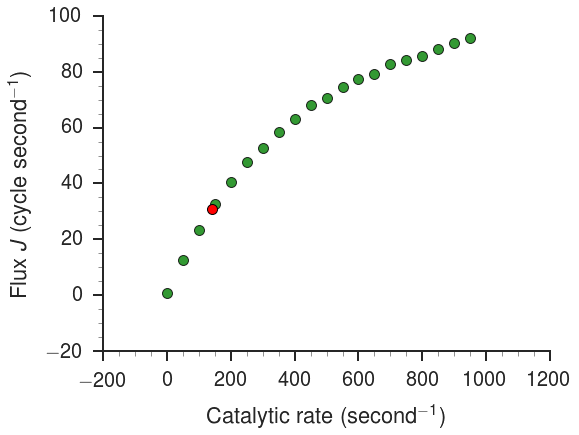

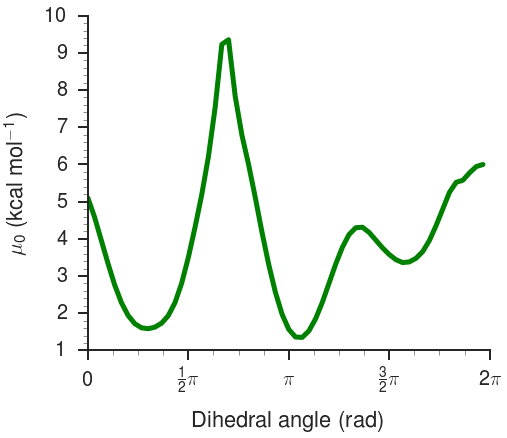

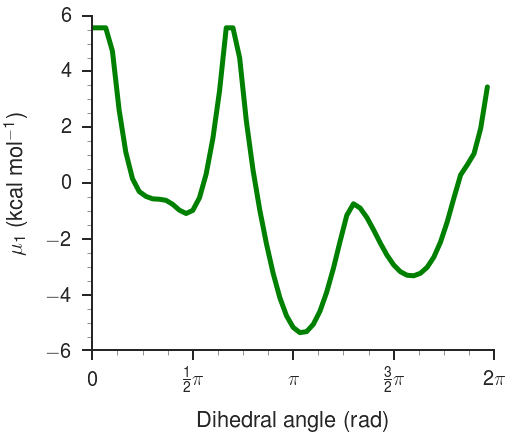

In [120]:
# name = 'psiSER311'
name = 'chi1PHE173'
fig = plt.figure(figsize=(8,6), dpi=300)
ax = fig.add_subplot(111)
for rate in np.arange(0, 1000, 50):
    this = simulation()
    this.name = name
    this.data_source = 'pka_md_data'
    this.catalytic_rate = rate
    this.simulate()
    ax.scatter(this.catalytic_rate, np.mean(this.flux_u + this.flux_b),
             c='g', s=100, alpha=0.8, marker = 'o', edgecolor = 'k', linewidth = 1.0)
    del this

this = simulation()
this.name = name
this.data_source = 'pka_md_data'
this.simulate()
ax.scatter(this.catalytic_rate, np.mean(this.flux_u + this.flux_b), 
         c='r', s=100, alpha=1, marker = 'o', edgecolor = 'k', linewidth = 1.0)    

ax.set_xlabel('Catalytic rate (second$^{-1}$)')
ax.set_ylabel('Flux $J$ (cycle second$^{-1}$)')
#ax.set_title(name)
#pretty_plot(fig)
aesthetics.paper_plot(fig)
this.plot_energy()

# Scan both bimolecular rate coefficient and the offset so that K_{D} will change.

In [189]:
x

array([ 4.        ,  4.26315789,  4.52631579,  4.78947368,  5.05263158,
        5.31578947,  5.57894737,  5.84210526,  6.10526316,  6.36842105,
        6.63157895,  6.89473684,  7.15789474,  7.42105263,  7.68421053,
        7.94736842,  8.21052632,  8.47368421,  8.73684211,  9.        ])

In [241]:
Kd_koff = pd.DataFrame()
name = 'chi1PHE173'
fluxes = []
num_points = 20
X = np.linspace(4, 9, num_points)
Y = np.linspace(0, 10, num_points)
for inter in X:
    for offset in Y:
        this = simulation()
        this.name = name
        this.data_source = 'pka_md_data'
        this.offset_factor = offset
        this.C_intersurface = 10**inter
        this.simulate()
        Kd_koff = Kd_koff.append(pd.DataFrame({'Offset': this.offset_factor,
                                'C': this.C_intersurface,
                                'Flux' : np.mean(this.flux_u + this.flux_b)
                                }, index=[0]), ignore_index=True)
        del this
print(max(Kd_koff['Flux']))
print(min(Kd_koff['Flux']))

41.6722040671
-1.28448098975


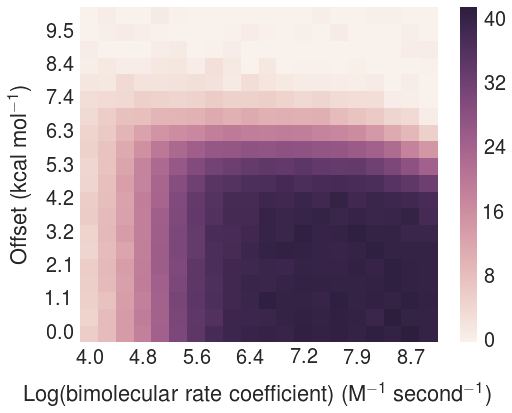

In [250]:
sns.set()
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 5})
sns.set_style("white")
mpl.rc('text', usetex=True)
mpl.rcParams['text.latex.preamble'] = [
    r'\usepackage{amsmath}',
    r'\usepackage{helvet}',
    r'\usepackage{sansmath}',
    r'\sansmath',
    r'\renewcommand{\familydefault}{\sfdefault}',
    r'\usepackage[T1]{fontenc}',
    r'\usepackage{graphicx}',
    # r'\usepackage{upgreek}',
]


# Kd_koff = Kd_koff.pivot("Offset", "C", "Flux")
fig = plt.figure(figsize=(8,6), dpi=300)
ax = fig.add_subplot(111)
xticks = ['' for x in X]
# xticks[::2] = ['$10^{' + '{0:0.1f}'.format(x) + '}$' for x in X[::2]]
xticks[::3] = ['${0:0.1f}$'.format(x) for x in X[::3]]
yticks = ['' for y in Y]
yticks[::2] = ['${0:0.1f}$'.format(y) for y in Y[::2]]

ax = sns.heatmap(Kd_koff, vmin=0, vmax=41.6722040671)
ax.set_xlabel('Log(bimolecular rate coefficient) (M$^{-1}$ second$^{-1}$)')
ax.set_xticklabels(xticks, rotation=0)
ax.set_ylabel('Offset (kcal mol$^{-1}$)')
ax.set_yticklabels(yticks, rotation=0)
# Increase padding
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 15

# aesthetics.paper_plot(fig, scientific=False)
# ax.set_xscale('log')

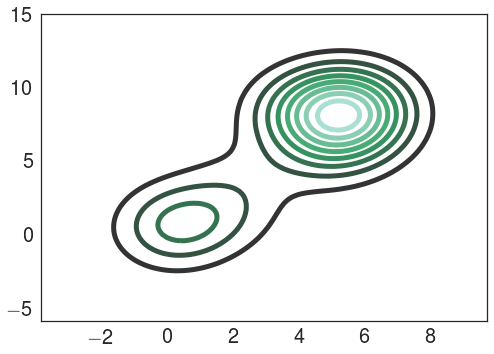

In [239]:
sns.kdeplot(Kd_koff)

In [218]:
dir = '../../md-data/pka-md-reversed-and-averaged'
this = simulation()

# this.name = 'psiSER311'
name = 'chi1PHE173'
this.unbound_population = np.genfromtxt(dir + '/apo/' + name + '_chi_pop_hist_targ.txt', delimiter=',',
                                   skip_header=1)
this.bound_population = np.genfromtxt(dir + '/atpmg/' + name + '_chi_pop_hist_ref.txt', delimiter=',',
                                   skip_header=1)
this.data_source = 'manual'
this.simulate()
this.plot_ss()

AttributeError: 'simulation' object has no attribute 'catalytic_rate'

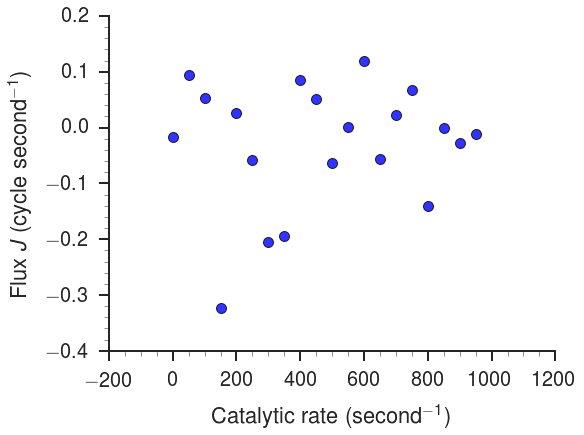

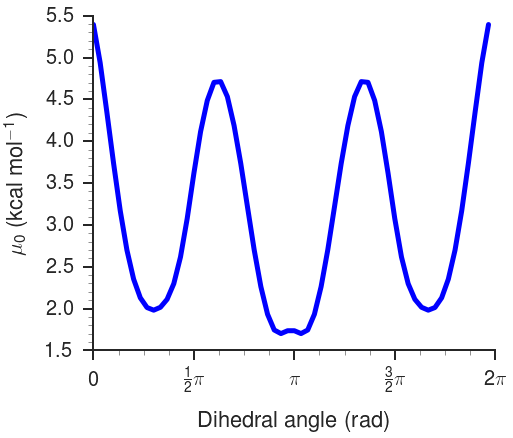

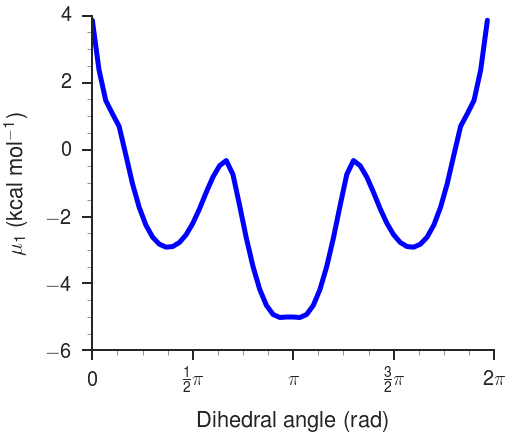

In [118]:
fig = plt.figure(figsize=(8,6), dpi=300)
ax = fig.add_subplot(111)

dir = '../../md-data/pka-md-reversed-and-averaged'
this = simulation()

for rate in np.arange(0, 1000, 50):
    this = simulation()
    this.name = 'chi1PHE173'
    this.unbound_population = np.genfromtxt(dir + '/apo/' + name + '_chi_pop_hist_targ.txt', delimiter=',',
                                       skip_header=1)
    this.bound_population = np.genfromtxt(dir + '/atpmg/' + name + '_chi_pop_hist_ref.txt', delimiter=',',
                                       skip_header=1)
    this.catalytic_rate = rate
    this.data_source = 'manual'
    this.simulate()
    ax.scatter(this.catalytic_rate, np.mean(this.flux_u + this.flux_b),
             c='b', s=100, alpha=0.8, marker = 'o', edgecolor = 'k', linewidth = 1.0)
    del this


ax.set_xlabel('Catalytic rate (second$^{-1}$)')
ax.set_ylabel('Flux $J$ (cycle second$^{-1}$)')
aesthetics.paper_plot(fig)
this = simulation()
this.name = 'chi1PHE173'
this.unbound_population = np.genfromtxt(dir + '/apo/' + name + '_chi_pop_hist_targ.txt', delimiter=',',
                                   skip_header=1)
this.bound_population = np.genfromtxt(dir + '/atpmg/' + name + '_chi_pop_hist_ref.txt', delimiter=',',
                                   skip_header=1)
this.catalytic_rate = rate
this.data_source = 'manual'
this.simulate()
this.plot_energy()

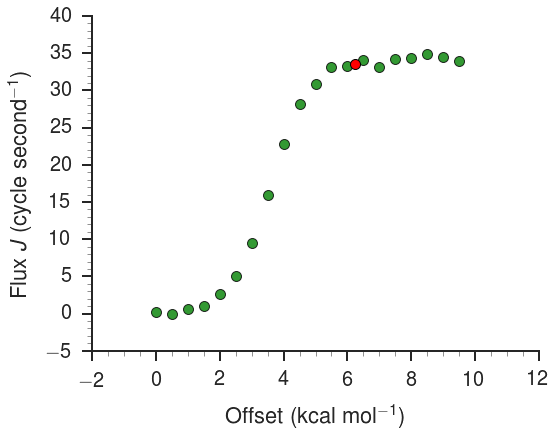

In [103]:
name = 'psiSER311'
fig = plt.figure(figsize=(8,6), dpi=300)
ax = fig.add_subplot(111)
for offset in np.arange(0, 10, 0.5):
    this = simulation()
    this.name = name
    this.data_source = 'pka_md_data'
    this.offset_factor = offset
    this.simulate()
    ax.scatter(this.offset_factor, np.mean(this.flux_u + this.flux_b),
             c='g', s=100, alpha=0.8, marker = 'o', edgecolor = 'k', linewidth = 1.0)
    del this

this = simulation()
this.name = name
this.data_source = 'pka_md_data'
this.simulate()
ax.scatter(this.offset_factor, np.mean(this.flux_u + this.flux_b), 
         c='r', s=100, alpha=1, marker = 'o', edgecolor = 'k', linewidth = 1.0)    

ax.set_xlabel('Offset (kcal mol$^{-1}$)')
ax.set_ylabel('Flux $J$ (cycle second$^{-1}$)')
#ax.set_title(name)
#pretty_plot(fig)
aesthetics.paper_plot(fig)

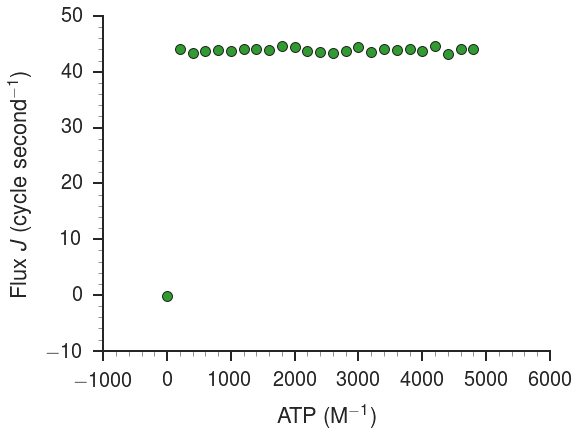

In [133]:
name = 'psiSER311'
fig = plt.figure(figsize=(8,6), dpi=300)
ax = fig.add_subplot(111)
for conc in np.arange(0, 5000, 200):
    this = simulation()
    this.name = name
    this.data_source = 'pka_md_data'
    this.cATP = conc
    this.simulate()
    ax.scatter(this.cATP, np.mean(this.flux_u + this.flux_b),
             c='g', s=100, alpha=0.8, marker = 'o', edgecolor = 'k', linewidth = 1.0)
    del this

this = simulation()
this.name = name
this.data_source = 'pka_md_data'
this.simulate()
# ax.scatter(this.cATP, np.mean(this.flux_u + this.flux_b), 
#         c='r', s=100, alpha=1, marker = 'o', edgecolor = 'k', linewidth = 1.0)    

ax.set_xlabel('ATP (M$^{-1}$)')
ax.set_ylabel('Flux $J$ (cycle second$^{-1}$)')
#ax.set_title(name)
#pretty_plot(fig)
# ax.set_xlim([10**-4.2, 10**2])
# ax.set_xscale('log')
aesthetics.paper_plot(fig)

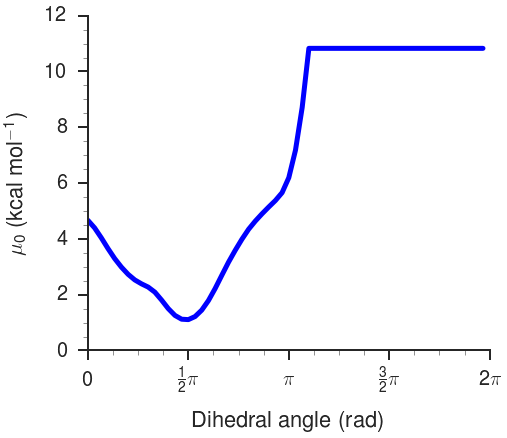

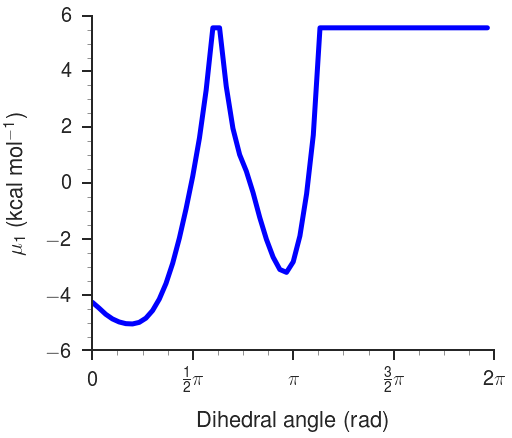

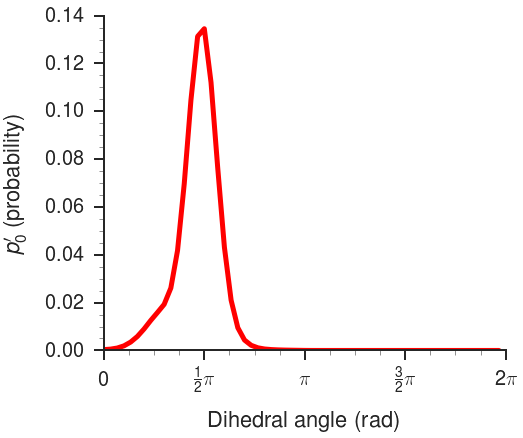

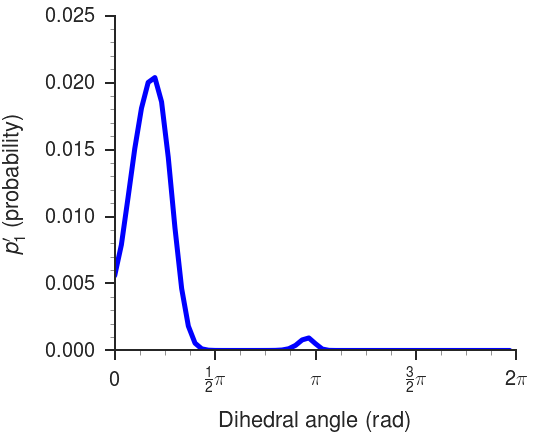

C_intrasurface = 	8.33e+13 second**-1
D = 			3.00e+15 degrees**2 second**-1
C_intersurface = 	2.40e+05 mol**-1 second**-1
Catalytic rate = 	140 second**-1
ATP concentration = 	0.002 M
Time step = 		1.00e-18 second
Intrasurface flux = 	-83.47 +/- 19.09 cycles second**-1


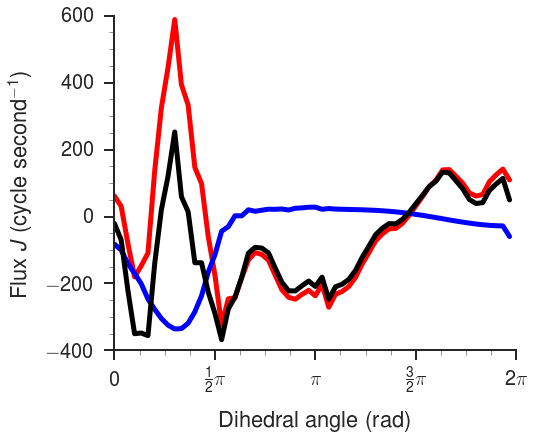

In [174]:
this = simulation()
this.name = 'chi3GLU194'
this.data_source = 'pka_md_data'
this.simulate(plot=True)

# Investigate the behavior of load

(-1e-06, 1e-06)

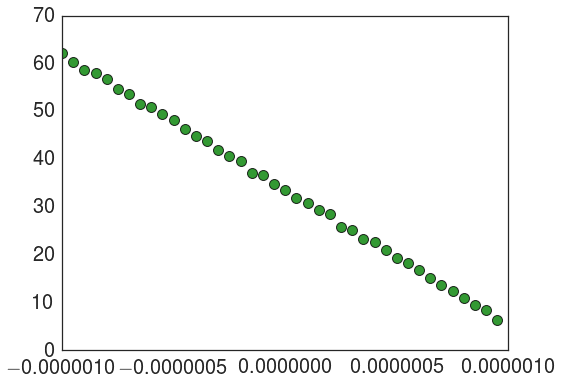

In [30]:
name = 'psiSER311'
fig = plt.figure(figsize=(8,6), dpi=300)
ax = fig.add_subplot(111)

for slope in np.arange(-0.000001, 0.000001, 0.00000005):

    this = simulation()
    this.name = name
    this.data_source = 'pka_md_data'
    this.load = True
    this.load_slope = slope
    this.simulate()
    ax.scatter(this.load_slope, np.mean(this.flux_u + this.flux_b),
             c='g', s=100, alpha=0.8, marker = 'o', edgecolor = 'k', linewidth = 1.0)
    del this

ax.set_xlim([-0.000001, 0.000001])

# Jensen-Shannon divergence

In [18]:
def JSD(x, y): #Jensen-shannon divergence
    x = np.array(x)
    y = np.array(y)
    d1 = x * np.log2(2 * x / (x + y))
    d2 = y * np.log2(2 * y / (x + y))
    d1[np.isnan(d1)] = 0
    d2[np.isnan(d2)] = 0
    d = 0.5 * np.sum(d1 + d2)
    return d

In [60]:
JSD_comparison = pd.DataFrame()
for file in range(len(pka_unbound_files)):
    name = os.path.splitext(os.path.basename(pka_unbound_files[file]))[0]
    name = re.search('^[^_]*', name).group(0)
    if name == 'chi1CYM185':
        pass
    else:
        this = simulation(data_source = 'pka_md_data')
        this.name = name
        this.simulate()
        flux_with_catalysis = np.mean(this.flux_u + this.flux_b)
        divergence = JSD(this.unbound, this.bound)
        del this
  
        JSD_comparison = JSD_comparison.append(pd.DataFrame({'Flux with catalysis': flux_with_catalysis,
                                     'JSD': divergence,
                                'File': name,
                                }, index=[0]), ignore_index=True)

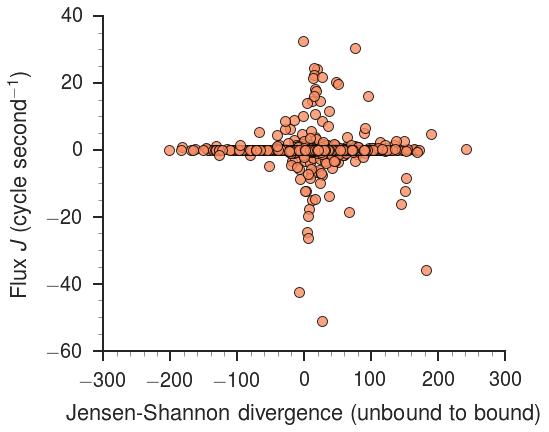

In [47]:
fig = plt.figure(figsize=(6*1.2,6), dpi=300)
ax = fig.add_subplot(111)
ax.scatter(JSD_comparison['JSD'], JSD_comparison['Flux with catalysis'], 
           c=cmap[1], s=100, alpha=0.8, marker = 'o', edgecolor = 'k', linewidth = 1.0)    
ax.set_xlabel('Jensen-Shannon divergence (unbound to bound)')
ax.set_ylabel('Flux $J$ (cycle second$^{-1}$)')
aesthetics.paper_plot(fig)

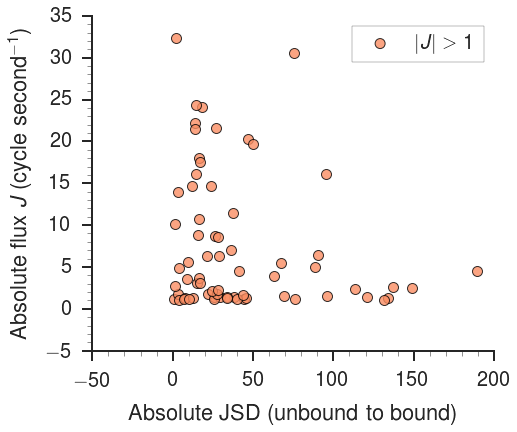

In [62]:
fig = plt.figure(figsize=(6*1.2,6), dpi=300)
ax = fig.add_subplot(111)
plt.scatter(
            abs(JSD_comparison[JSD_comparison['Flux with catalysis'] > 1]['JSD']), abs(JSD_comparison[JSD_comparison['Flux with catalysis'] > 1]['Flux with catalysis']),
            c=cmap[1], s=100, alpha=0.8, marker = 'o', edgecolor = 'k', linewidth = 1.0, label=r'$|J| > 1$')    
ax.set_xlabel('Absolute JSD (unbound to bound)')
ax.set_ylabel('Absolute flux $J$ (cycle second$^{-1}$)')
ax.legend(frameon=True)
aesthetics.paper_plot(fig)

In [18]:
JSD_comparison

,File,Flux with catalysis,JSD
0,chi1ARG119,-0.016199,74.555417
1,chi1ARG120,0.000849,42.778789
2,chi1ARG123,-0.192149,83.993277
3,chi1ARG130,-0.121837,86.726809
4,chi1ARG151,24.127884,18.258908
5,chi1ARG176,0.363640,48.987755
6,chi1ARG180,4.537200,-41.407432
7,chi1ARG242,-1.091996,-16.262726
8,chi1ARG256,-0.011811,20.275723
9,chi1ARG266,0.004353,88.601648


## Let's look at the JSD between a surface and its own symmetrized version

In [49]:
JSD_comparison = pd.DataFrame()
for file in range(len(pka_unbound_files)):
    name = os.path.splitext(os.path.basename(pka_unbound_files[file]))[0]
    name = re.search('^[^_]*', name).group(0)
    if name == 'chi1CYM185':
        pass
    else:
        this = simulation(data_source = 'pka_md_data')
        this.name = name
        this.simulate()
        flux_with_catalysis = np.mean(this.flux_u + this.flux_b)
        
        dir = '../../md-data/pka-md-reversed-and-averaged'
        symmetrized_unbound = np.genfromtxt(dir + '/apo/' + this.name + '_chi_pop_hist_targ.txt', delimiter=',',
                                       skip_header=1)
        symmetrized_bound = np.genfromtxt(dir + '/atpmg/' + this.name + '_chi_pop_hist_ref.txt', delimiter=',',
                                       skip_header=1)



        divergence_u = JSD(this.unbound, symmetrized_unbound)
        divergence_b = JSD(this.bound, symmetrized_bound)

        del this
  
        JSD_comparison = JSD_comparison.append(pd.DataFrame({'Flux with catalysis': flux_with_catalysis,
                                     'JSD_u': divergence_u,
                                     'JSD_b': divergence_b,
                                'File': name,
                                }, index=[0]), ignore_index=True)

In [50]:
JSD_comparison.sort_values(by='Flux with catalysis', ascending=False)

,File,Flux with catalysis,JSD_b,JSD_u
1281,psiSER311,32.364002,32.462777,98.147173
194,chi1PHE173,30.531280,-11.529582,114.131816
32,chi1ASP152,24.312401,66.996622,140.830265
4,chi1ARG151,24.127884,-13.370656,121.544173
83,chi1GLU3,22.248272,-59.343197,108.712214
392,chi2ILE136,21.603860,-42.558919,121.799049
357,chi2GLN70,21.460914,-63.764109,113.979360
43,chi1ASP309,20.243326,-22.859343,108.756860
207,chi1PHE40,19.695701,-53.023853,130.710931
100,chi1ILE166,18.042627,-42.435063,130.385095


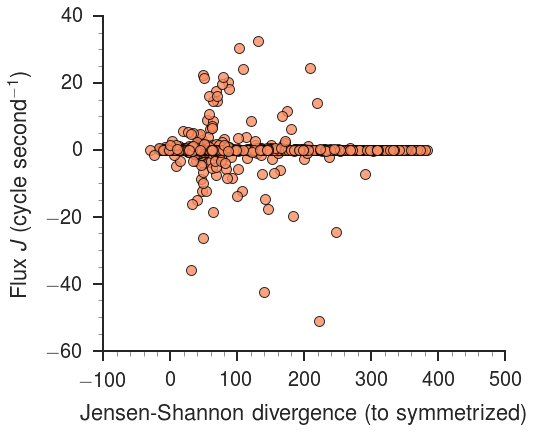

In [51]:
fig = plt.figure(figsize=(6*1.2,6), dpi=300)
ax = fig.add_subplot(111)
ax.scatter(JSD_comparison['JSD_u'] + JSD_comparison['JSD_b'], JSD_comparison['Flux with catalysis'], 
            c=cmap[1], s=100, alpha=0.8, marker = 'o', edgecolor = 'k', linewidth = 1.0, label=r'$J > 1$')    
ax.set_xlabel('Jensen-Shannon divergence (to symmetrized)')
ax.set_ylabel('Flux $J$ (cycle second$^{-1}$)')
aesthetics.paper_plot(fig)

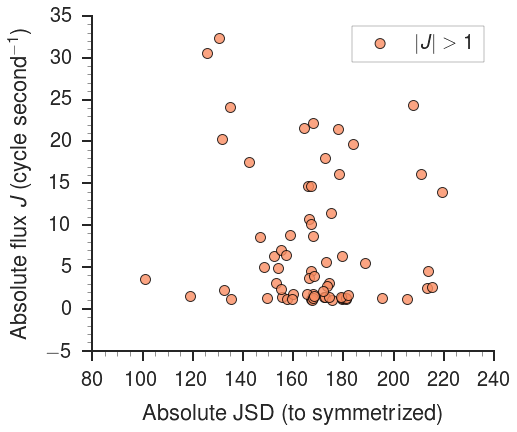

In [59]:
fig = plt.figure(figsize=(6*1.2,6), dpi=300)
ax = fig.add_subplot(111)


plt.scatter(
            abs(JSD_comparison[JSD_comparison['Flux with catalysis'] > 1]['JSD_u']) + 
            abs(JSD_comparison[JSD_comparison['Flux with catalysis'] > 1]['JSD_b']), 
    abs(JSD_comparison[JSD_comparison['Flux with catalysis'] > 1]['Flux with catalysis']),
                c=cmap[1], s=100, alpha=0.8, marker = 'o', edgecolor = 'k', linewidth = 1.0, label=r'$|J| > 1$')    

ax.set_xlabel('Absolute JSD (to symmetrized)')
ax.set_ylabel('Absolute flux $J$ (cycle second$^{-1}$)')
ax.legend(frameon=True)
aesthetics.paper_plot(fig)